In [1]:
from collections import Counter

c = Counter()
c.update([0]*5)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from bwb.distributions import *
from bwb.utils import *

import pandas as pd
import itertools

In [3]:
import logging
log = logging.getLogger("bwb.distributions")
log.setLevel(logging.WARNING)
# log.setLevel(logging.INFO)

In [4]:
data = np.load(r"..\data\face.npy")
data.shape

(161666, 784)

In [5]:
CEIL = 50
n_faces = len(data)
rng = np.random.default_rng(42)

In [6]:
%%time


# Builder para hacer las caritas
dist_draw_builder = DistributionDrawBuilder(
    seed=rng,
)

# Conjunto de caritas originales (distintos soportes)
faces_original = list()
for i in range(n_faces):
    arr = 255 - data[i, :].reshape(28, 28)
    dd_arr = dist_draw_builder.create_fromarray(arr)
    faces_original.append(dd_arr)
    
    
# Conjuntos de caritas con soporte no-nulo
dist_draw_builder.set_ceil(CEIL)
    
faces_modified = list()
for i in range(n_faces):
    arr = 255 - data[i, :].reshape(28, 28)
    dd_arr = dist_draw_builder.create_fromarray(arr)
    faces_modified.append(dd_arr)
    
len(faces_original), len(faces_modified)

CPU times: total: 11.8 s
Wall time: 11.9 s


(161666, 161666)

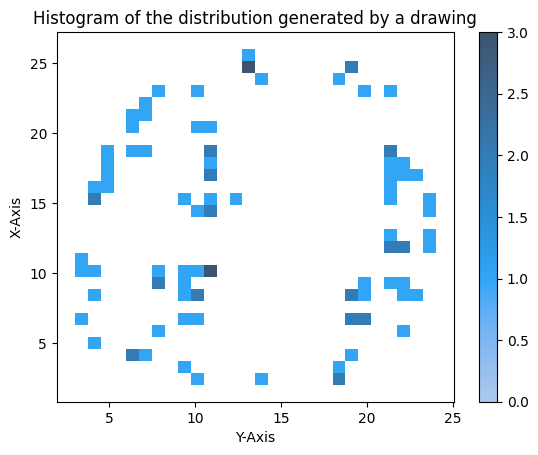

In [7]:
first_face = DistributionDraw.fromarray(
    255 - data[0, :].reshape(28, 28),
    seed=42
)

x = first_face.rvs(size=100)

plot_histogram_from_points(x, histplot_kwargs=dict(bins=28))
plt.show()

In [8]:
posterior1 = ExplicitPosteriorPiN(
    data=x[:10], 
    models=faces_original[:10], 
    seed=rng,
)
posterior2 = ExplicitPosteriorPiN(
    data=x[:10], 
    models=faces_original[:20], 
    seed=rng,
)
posterior1, posterior2
arr_post = np.array([posterior1, posterior2])
arr_post

array([ExplicitPosteriorPiN(n_data=10, n_models=10),
       ExplicitPosteriorPiN(n_data=10, n_models=20)], dtype=object)

In [9]:
%%time
posterior = ExplicitPosteriorPiN(
    data=x[:10], 
    models=faces_original, 
    seed=rng,
    lazy_init=False
)
posterior

CPU times: total: 33.1 s
Wall time: 37.1 s


ExplicitPosteriorPiN(n_data=10, n_models=161666)

In [10]:
%%time
posterior.rvs(size=8119812)

CPU times: total: 4.22 s
Wall time: 4.48 s


 ...]

In [11]:
posterior.samples_counter

Counter({120959: 155597,
         62642: 19368,
         132726: 206859,
         109797: 64313,
         7901: 66283,
         159147: 5805,
         116565: 6655,
         17131: 3567,
         66270: 39026,
         51623: 392879,
         144294: 131895,
         101496: 83820,
         132284: 130577,
         65268: 16192,
         34575: 28538,
         79011: 42469,
         3248: 56859,
         100079: 38424,
         115855: 12323,
         154913: 23050,
         137831: 10310,
         26413: 7703,
         69290: 17896,
         1719: 188726,
         23301: 8292,
         106311: 38713,
         115338: 155468,
         154261: 25535,
         48837: 84696,
         69943: 24779,
         24318: 120715,
         17819: 34962,
         71521: 6044,
         34511: 272,
         105135: 13326,
         62073: 5387,
         46686: 22568,
         124201: 774,
         44642: 222493,
         105806: 3407,
         20388: 10641,
         27684: 40198,
         575: 244541,


In [12]:
plot_list_of_draws(posterior.most_common(), labels=freq_labels_posterior(posterior))

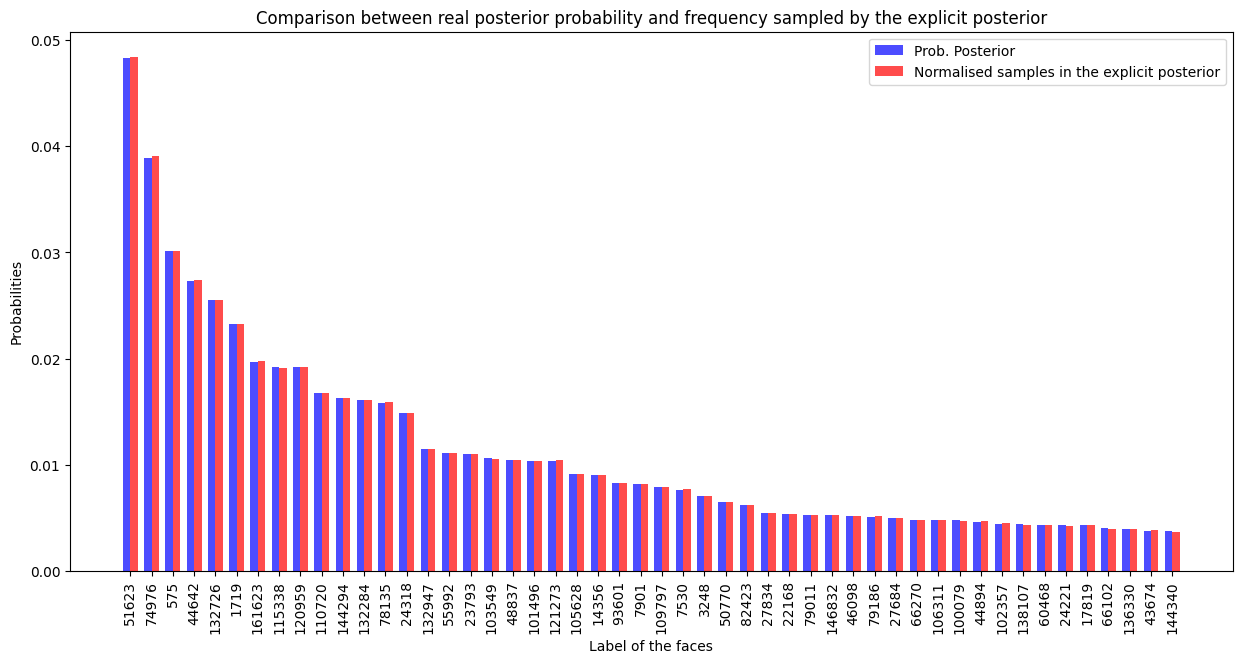

In [13]:
plt.figure(figsize=(15, 7))

posterior_probs_keys = list(likelihood_ordered_dict(posterior).keys())[:50]
str_keys_list = [str(k) for k in posterior_probs_keys]
posterior_probs_values = [likelihood_ordered_dict(posterior)[k] for k in posterior_probs_keys]

normalised_samples = [normalised_samples_ordered_dict(posterior).get(k, 0) for k in posterior_probs_keys]

plt.bar(str_keys_list, posterior_probs_values,
        width=-0.35, align="edge", color="b", alpha=0.7, label="Prob. Posterior")

plt.bar(str_keys_list, normalised_samples,
        width=0.35, align="edge", color="r", alpha=0.7, label="Normalised samples in the explicit posterior")

plt.title("Comparison between real posterior probability and frequency sampled by the explicit posterior")
plt.xlabel("Label of the faces")
plt.ylabel("Probabilities")
plt.legend()
plt.xticks(rotation=90)
plt.show()